<a href="https://colab.research.google.com/github/OwenHuels/data-science/blob/main/Owen_Unit7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

Polynomial elements can help to account for more complex trends in our data. This means that if our data doesn't show a simply straight line trend, we can capture it by using higher degree polynomials.

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

If our relationship between our variables isn't that complex, we wouldn't want to use a polynomial element in our models because polynomial model tend to overfit pretty hard; It's difficult to prevent them from doing so in comparison to other types of models. Simpler models are also easier to interpret and generally run faster, so if the models seem to have equal predictive power, then we pick the one with no polynomial element.

**Task3**:

What's the point of using b splines?

B splines are useful when different parts (spaces on the x-axis) of our model have different trends going on. A b spline allows us to seperate these parts and fit different models to each one, which then are combined back together and weighted based on the number of data points in each splice. The reason we would use a b spline is that it gives us more flexibility to interpret our data in different ways, just like a polynomial regression, while making sure not to overfit the parts of our data that aren't too complex, which is where polynomial regressions tend to struggle.

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

A Gaussian Process is a kind of limiting of a NN. A NN is like a b spline where instead of spliting the x axis into range and analyzing the trends within those ranges, you look at data points indivudally and analyze its relationships to the points around it. When the number of these points we analyze is every single data point available, that's a Gaussian Process. A Gaussian Process is kind of like a theoretically perfect model, but it's very intensive to run, which is why they aren't used very often.

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


In [19]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-5uu30lpj
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-5uu30lpj
  Resolved https://github.com/pydata/xarray.git to commit 1189240b2631fa27dec0cbea76bf3cf977b42fce
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [20]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb

In [21]:
howell = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/howell.csv')

In [29]:
formula_howell = bmb.Formula(
    "weight ~ poly(height, 3)",
    "sigma ~ height"
)

model_dis = bmb.Model(formula_howell, howell)

idata_dis = model_dis.fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


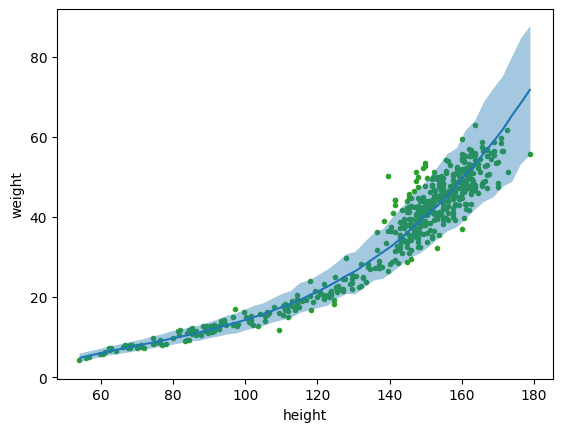

In [30]:
bmb.interpret.plot_predictions(model_dis, idata_dis, "height", pps=True)
plt.plot(howell.height, howell.weight, "C2.", zorder=-3)

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

I learned that you can design very accurate covariance function to give to your model if you have a lot of prior knowledge about what is going on with your data. The author made the model specifically switches priors at the time of the industrial revolution, which makes sense because human impact on the environment became much more significant and observable beginning at that time, so a more strong relationship with less variance should be allowed to occur after that time.

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

My favorite graph was the very first black and blue graph of the posterior predictive samples, coming from the first model. I found this graph very interesting because it predict the observed data extremely well, but the trend going to the future is way off from what we would reasonably expect in the real world. The fact that you can create a model whos fit is so good but whose future predictive power is so bad shows how careful you need to be that you actually understand what your model is doing to avoid making predictions that make mathematical sense but realistically make no logical sense.